### La implementación de Holt's involucra la presencia de **Tendencia**
### Es necesario manipular su coeficiente de tendencia "betha" 

In [1]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt  

In [2]:
df = pd.read_csv('data/airline_passengers.csv', index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.index.freq = 'MS'

In [110]:
# Crear el objeto
holt = Holt(df['Passengers'], initialization_method='legacy-heuristic')

In [111]:
# Se hace un entrenamiento con los parametros optimizados automáticamente
res_h = holt.fit()
print(f"Valor suavizado nivel alpha: {res_h.params['smoothing_level']}")
print(f"Valor suavizado tendencia:   {res_h.params['smoothing_trend']}")

Valor suavizado nivel alpha: 0.995018689463307
Valor suavizado tendencia:   0.003818912222562142


In [112]:
df['Holt'] = res_h.fittedvalues

<Axes: xlabel='Month'>

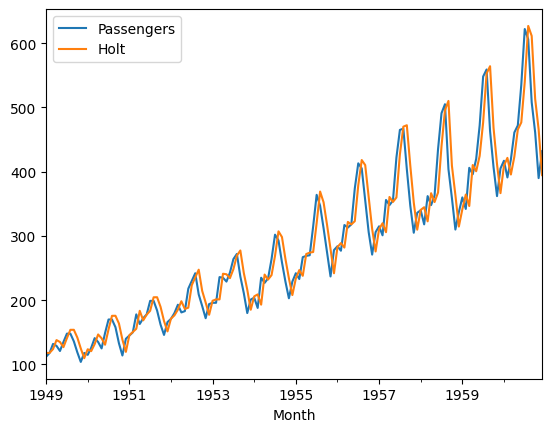

In [113]:
df[['Passengers', 'Holt']].plot()

### Ahora se trata como un problema de ML estableciendo un conjunto de entrenamiento y otro de pruebas

In [22]:
n_test = 12
train = df.iloc[:-n_test]
test = df.iloc[-n_test:]

In [ ]:
# Creamos el objeto, es importante declararlo solamente con los datos de entrenamiento
holts_model = Holt(train['Passengers'], initialization_method='legacy-heuristic')

In [24]:
# Hacemos un entrenamiento autmatico para obtener los parametros optimizados
res_h = holts_model.fit()

In [25]:
print(f"Valor suavizado nivel alpha: {res_h.params['smoothing_level']}")
print(f"Valor suavizado tendencia:   {res_h.params['smoothing_trend']}")

Valor suavizado nivel alpha: 0.9999999850988388
Valor suavizado tendencia:   0.0039049930446378024


In [26]:
res_h.fittedvalues

Month
1949-01-01    118.000000
1949-02-01    117.976570
1949-03-01    123.976662
1949-04-01    138.007992
1949-05-01    134.972817
                 ...    
1959-08-01    553.118832
1959-09-01    564.141799
1959-10-01    467.746842
1959-11-01    411.509626
1959-12-01    366.316291
Freq: MS, Length: 132, dtype: float64

In [27]:
res_h.predict(n_test)

Month
1950-01-01    123.745686
1950-02-01    120.711535
1950-03-01    131.732186
1950-04-01    146.768377
1950-05-01    140.722422
                 ...    
1959-08-01    553.118832
1959-09-01    564.141799
1959-10-01    467.746842
1959-11-01    411.509626
1959-12-01    366.316291
Freq: MS, Length: 120, dtype: float64

In [28]:
# Vector booleano para entrenamiento y pruebas, utilizando los indices. Sirve para hacer la asignacion de predicciones en una nueva columna del df
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]
type(test_idx)

numpy.ndarray

In [29]:
# Asigno los valres de las predicciones y el forecasting al dataset usando los indices
df.loc[train_idx, 'Holt'] = res_h.fittedvalues
df.loc[test_idx, 'Holt'] = res_h.forecast(n_test)

<Axes: xlabel='Month'>

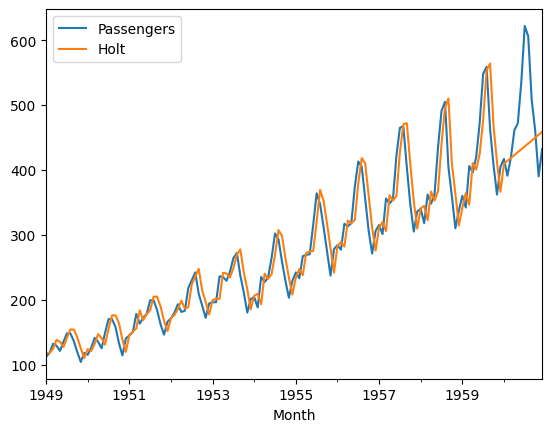

In [30]:
df[['Passengers', 'Holt']].plot()